Name: Vijay Kate 

Task1: Prediction using Supervised ML (Predict the percentage of an student based on the no. of study hours.)

Alogorithm: Linear Regression

 1) Imported required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2) Imported dataset from url 

In [ ]:
data=pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


3) Understanding the  data and data cleaning

In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull().sum() 

Hours     0
Scores    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

4) Checking For outliers

In [ ]:
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


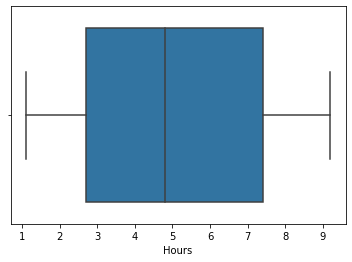

In [ ]:
sns.boxplot(data['Hours'])
plt.show()
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


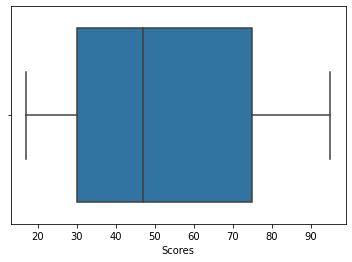

In [ ]:
sns.boxplot(data['Scores'])

5) To find the relation berween variables

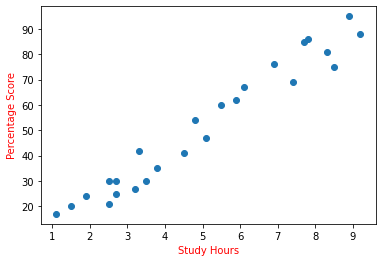

In [ ]:
plt.scatter(data['Hours'],data['Scores'])
plt.xlabel('Study Hours',color='red')
plt.ylabel('Percentage Score',color='red')
plt.show()

6) Splitted data into 'x' as indepedent variable 'y' as dependent variable

In [ ]:

x=data[['Hours']]
y=data[['Scores']]

7) Randomly splitted data into train and test data

In [ ]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

8) Training of data

In [ ]:
from sklearn.linear_model import LinearRegression 
ls=LinearRegression()




In [ ]:
ls.fit(x_train, y_train)

LinearRegression()

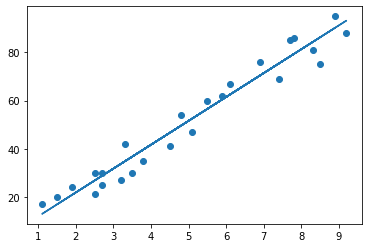

In [ ]:
line = ls.coef_*x+ls.intercept_ # plotted best fit line for study hours and percentage score
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

9) Prediction using Linear Regression


In [ ]:
y_pred=ls.predict(x_test)

In [ ]:
data1=pd.DataFrame(y_test.values.reshape(-1),y_pred.reshape(-1))
data1=data1.reset_index()
data1.columns=['Actual','Predicted']
data1

,Actual,Predicted
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


In [ ]:
hours = [[9.25]]         # prediction for your own data i.e for study hour predicted percentage score
y1_pred= ls.predict(hours)
print("No of Hours = {}".format(hours[0][0]))
print("Predicted Score = {}".format(y1_pred[0][0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


10) Model Evaluation 

In [ ]:
from sklearn import metrics  


In [34]:
metrics.mean_absolute_error(y_pred,y_test)
print(f'Mean abslute error= {metrics.mean_absolute_error(y_pred,y_test)}')

Mean abslute error= 4.183859899002982


In [35]:
metrics.r2_score(y_pred,y_test)
print(f'R square= {metrics.r2_score(y_pred,y_test)}')

R square= 0.9546785947197246


In [ ]:
# 95 % of variance of percentage score is explained by study hours.